In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load MP3
mp3_file = "piano_mp3/alb_esp1.mp3"
y, sr = librosa.load(mp3_file, sr=None) # with origional sample rate

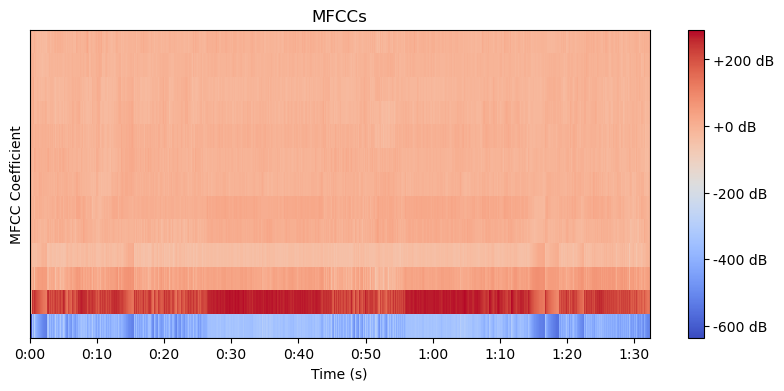

In [4]:
# Compute MFCCs
n_mfcc = 13  # Number of MFCC coefficients (adjust as needed)
hop_length = 512
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)

# Visualize the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.0f dB")
plt.title("MFCCs")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficient")
plt.show()

In [23]:
# import and align midi
import pretty_midi

# Load the MIDI file
midi_file_path = 'piano_midi/alb_esp1_format0.mid'
midi_data = pretty_midi.PrettyMIDI(midi_file_path)

# Extract note information (start time, end time, pitch, velocity)
notes = []
for instrument in midi_data.instruments:
    for note in instrument.notes:
        notes.append({
            'start_time': note.start,
            'end_time': note.end,
            'pitch': note.pitch,
            'velocity': note.velocity
        })


# Align MIDI notes with MFCC frames
hop_length = 512  # Adjust as needed
for note in notes:
    start_frame = int(note['start_time'] * sr / hop_length)
    end_frame = int(note['end_time'] * sr / hop_length)
    mfcc_features = mfccs[:, start_frame:end_frame]

    # Process the MFCC features for each note (e.g., compute mean, variance)

# Now you have aligned MIDI features with MFCCs!

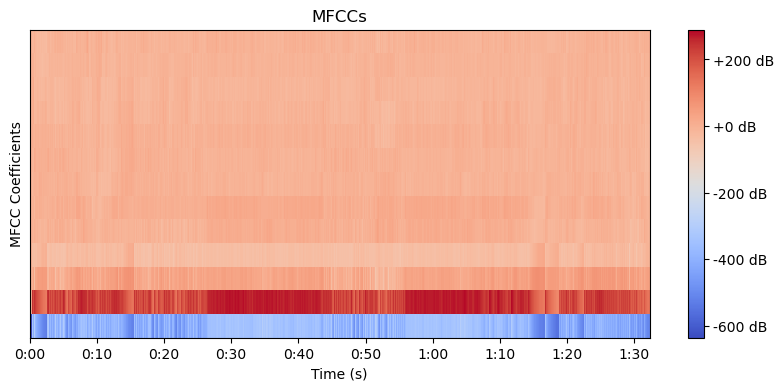

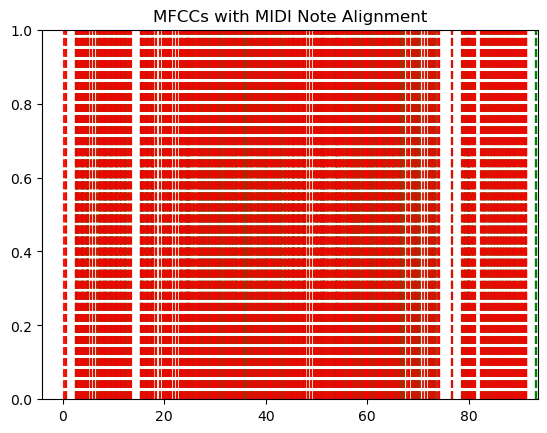

In [25]:
import matplotlib.pyplot as plt
import librosa.display

# Create a time axis for MFCCs
duration = len(mfccs) / sr
time_axis = librosa.times_like(mfccs, sr=sr)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()

# Now let's overlay the MIDI notes
for note in notes:
    plt.axvline(x=note['start_time'], color='r', linestyle='--', alpha=0.7)
    plt.axvline(x=note['end_time'], color='g', linestyle='--', alpha=0.7)

plt.title('MFCCs with MIDI Note Alignment')
plt.show()